#Regressão Linear - Machine Learning


Regressão linear é um modelo estatístico  que permite estimar a condicional (valor esperado) de uma variável y, dados os valores de algumas outras variáveis x.

**O modelo apresentado calcula o valor estimado de um empréstimo baseado no salário de um determinado indivídio (estimando o valor de Y, baseado nos valores de X).**

* Eixo X = Salário
* Eixo Y = Empréstimo


Base de dados fictícia usada para fins educacionais.


## 1) Importar bibliotecas internas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/BaseDados_RegressaoLinear.xlsx', 'Plan1')
df

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000
...,...,...
94,3185.629581,7279.937858
95,3217.485877,7315.799621
96,3249.660736,7351.661384
97,3282.157343,7387.523147


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
#valores estatísticos
df.describe()

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


In [ ]:
# converter valores para um array (converter coluna para lista)
eixo_x = df.iloc[:,0].values
eixo_y = df.iloc[:,1].values
eixo_x


array([1250.21913   , 1262.7213213 , 1275.34853451, 1288.10201986,
       1300.98304006, 1313.99287046, 1327.13279916, 1340.40412715,
       1353.80816843, 1367.34625011, 1381.01971261, 1394.82990974,
       1408.77820883, 1422.86599092, 1437.09465083, 1451.46559734,
       1465.98025331, 1480.64005585, 1495.4464564 , 1510.40092097,
       1525.50493018, 1540.75997948, 1556.16757927, 1571.72925507,
       1587.44654762, 1603.32101309, 1619.35422323, 1635.54776546,
       1651.90324311, 1668.42227554, 1685.1064983 , 1701.95756328,
       1718.97713891, 1736.1669103 , 1753.52857941, 1771.0638652 ,
       1788.77450385, 1806.66224889, 1824.72887138, 1842.97616009,
       1861.4059217 , 1880.01998091, 1898.82018072, 1917.80838253,
       1936.98646635, 1956.35633102, 1975.91989433, 1995.67909327,
       2015.6358842 , 2035.79224305, 2056.15016548, 2076.71166713,
       2097.4787838 , 2118.45357164, 2139.63810736, 2161.03448843,
       2182.64483331, 2204.47128165, 2226.51599446, 2248.78115

## Relação entre variáveis

De imediato é possível observar um padrão crescente entre as duas variáveis, "Salário" e "Limite", ambos os valores crescem de forma conjunta.

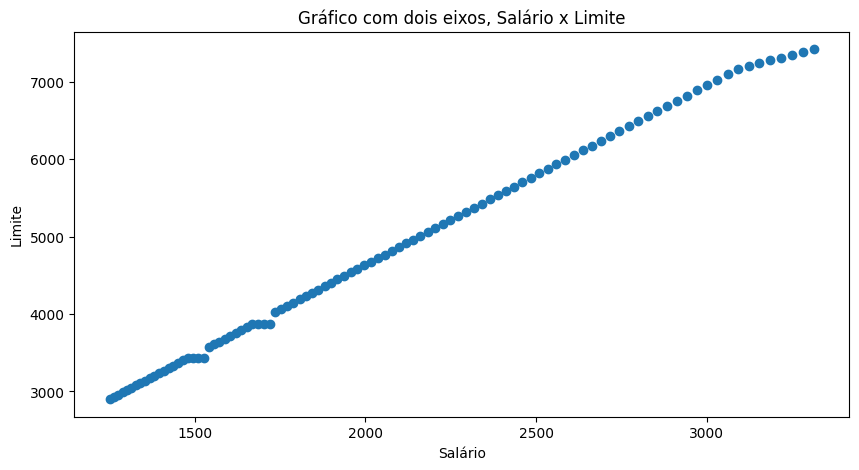

In [ ]:
plt.figure( figsize=(10,5))
plt.scatter(eixo_x,eixo_y);
plt.title('Gráfico com dois eixos, Salário x Limite')
plt.xlabel('Salário')
plt.ylabel('Limite');

#Existe uma Linearidade dos dados, é possível fazer uma regressão linear

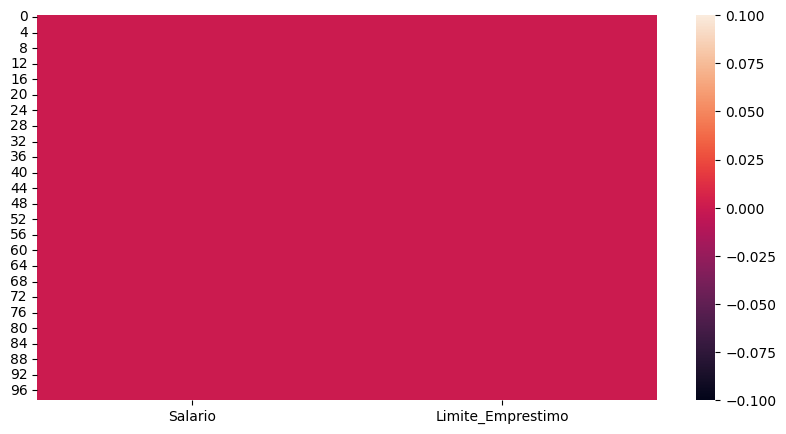

In [ ]:
#Verificando se há valores nulos no gráfico
plt.figure( figsize=(10,5));
sns.heatmap(df.isnull());

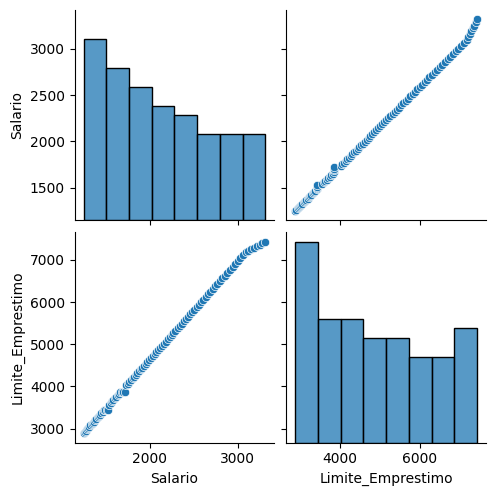

In [ ]:
#Gráfico para todas as várias da base com pairplot()
ns.pairplot(df);

#Verificar se existe correlação entre os dados

A correlação é sempre medida por valores de -1 a 1.
Quanto mais próximo dos extremos (-1 ou 1), maior é a força da correlação, enquanto valores próximos de 0 implicam em correlações mais fracas ou inexistentes.

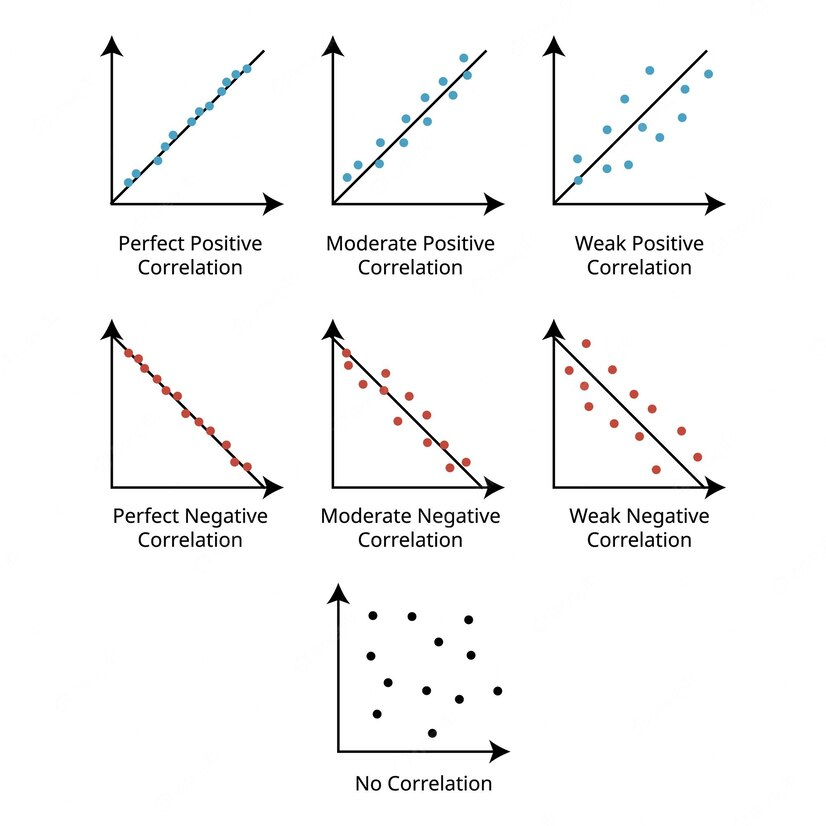

In [ ]:
correlacao = np.corrcoef(eixo_x, eixo_y)
correlacao

array([[1.        , 0.99949773],
       [0.99949773, 1.        ]])

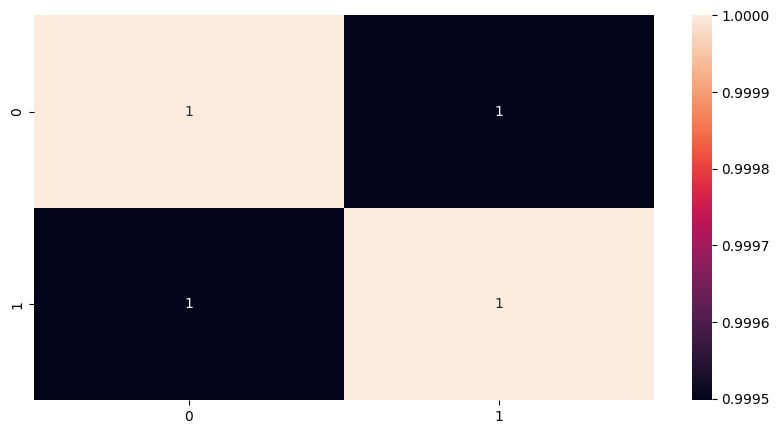

In [ ]:
plt.figure( figsize=(10,5));
sns.heatmap( correlacao,annot=True);

In [ ]:
# -1 não muda a estrutura das linhas
#reshape converte os valores para formato de matriz
eixo_x = eixo_x.reshape(-1,1)
eixo_y = eixo_y.reshape(-1,1)


In [ ]:
#biblioteca de divide dados em treino e teste
from sklearn.model_selection import train_test_split

#Separação de dados para treino e teste


 80% dos dados serão treinamento

 20% dos dados serão usados para teste

In [ ]:

x_treinamento,x_teste,y_treinamento,y_teste = train_test_split(
    eixo_x,
    eixo_y,
    test_size = 0.20

)


In [ ]:
print(len(x_treinamento), len(x_teste))

79 20


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
funcao_regressao = LinearRegression()

#Treinamento do Modelo

Como o salário interfere no limite de empréstimo.

Utilização da função fit() para treinar o modelo.

In [ ]:
funcao_regressao.fit(x_treinamento,y_treinamento)

LinearRegression()

Acurácia do modelo: 0.99

In [ ]:
funcao_regressao.score(x_treinamento, y_treinamento)

0.9988539814547822

# Plotagem da reta da regressão

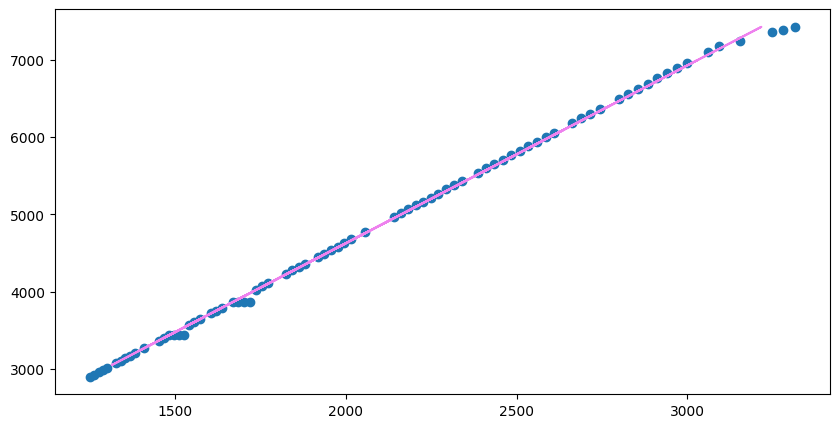

In [ ]:
plt.figure( figsize=(10,5));
plt.scatter(x_treinamento, y_treinamento)
plt.plot(x_teste, funcao_regressao.predict(x_teste), color='violet');

#Calculando a taxa de erro do modelo com RMSE

RMSE (Root Mean Squared Error) é uma medida de erro absoluto que eleva os desvios ao quadrado para impedir que os desvios positivos e negativos se cancelem

O modelo tem uma escala de erro médio de: 32.18


In [ ]:
previsoes = funcao_regressao.predict(x_teste)

from sklearn import metrics
print('RMSE', np.sqrt(metrics.mean_squared_error(y_teste, previsoes)))

RMSE 32.18813008834287


#Fazendo as previsões e testando a eficácia do modelo

* Para calcular o limite do empréstimo baseado no salário, insira o valor do salário na função predict() para obter o limite do empréstimo.

Exemplo: se o salário for 5000 o limite de empréstimo será 11514.

*A função predict() retorna uma matriz de previsões para cada instância de dados no conjunto de testes.*

In [ ]:
print(funcao_regressao.predict([[5000]]))

[[11514.73341268]]
